### Multiclass(Multimodal) Logistic Regression (다중클래스 로지스틱 회귀)
#### Programmed by <kyoo@yu.ac.kr>

- Dataset: Iris data (총 150개의 붓꽃에 대한 수치적 정보)
- Feature dimension: 2차원 (sepal length, sepal width의 2개만 사용함)
- Number of classes: 3 {Iris-setosa, Iris-vericolor, Iris-virginica}
- Train : Test = 7:3 (= 105개:45개)
- Training method: Logistic regression

#### 데이터셋 준비

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            random_state= 0, train_size=0.7)
X_train = X_train[:, :2]
X_test = X_test[:, :2]

print('Dataset size = ', len(X[:,0]))
print("Shapes of Train features = ", X_train.shape)
print("Shapes of Test feature = ", X_test.shape)
print('Feature dimension = ', len(X[0,:]))
print('Train : Test = {0}:{1}'.format(len(X_train)/len(X), len(X_test)/len(X)))

Dataset size =  150
Shapes of Train features =  (105, 2)
Shapes of Test feature =  (45, 2)
Feature dimension =  4
Train : Test = 0.7:0.3


#### 로지스틱회귀에 의한 훈련

In [2]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
print('weights = ', log_reg.coef_)
print('bias    = ', log_reg.intercept_)

weights =  [[-2.45525922  1.99374223]
 [ 0.49479793 -1.34221245]
 [ 1.9604613  -0.65152978]]
bias    =  [ 7.60145482  1.68056789 -9.28202271]


#### 성능평가
- 훈련 데이터에 의한 성능 (정확도)
- 데스트 데이터에 의한 성능 (정확도)

In [3]:
print("Training set performance:",log_reg.score(X_train, y_train))
print("Test set performance:",log_reg.score(X_test, y_test))

Training set performance: 0.8285714285714286
Test set performance: 0.8222222222222222


#### 예측 (Prediction) 관련 정보들

In [4]:
print('sample = ', X[0:1,2])
print('Predicted class label = ', log_reg.predict(X[0:1,:2]))
print('Probability estimates = ', log_reg.predict_proba(X[0:1,:2]))
print('Predicted confidence score = ', log_reg.decision_function(X[0:1,:2]))

sample =  [1.4]
Predicted class label =  [0]
Probability estimates =  [[0.90521882 0.07057951 0.02420167]]
Predicted confidence score =  [[ 2.05773059 -0.49370626 -1.56402433]]


#### 데이터 시각화 하기 (1) - Training dataset

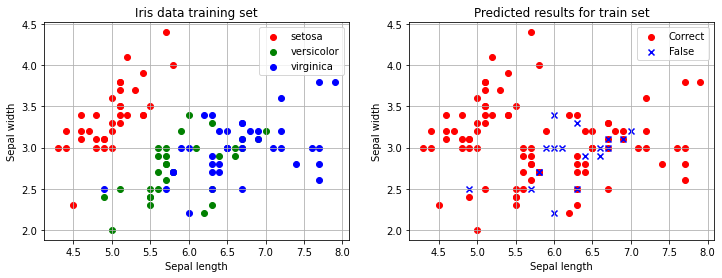

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y_train_pred = log_reg.predict(X_train)
correct_train_index = y_train_pred == y_train
false_train_index = y_train_pred != y_train

y_test_pred = log_reg.predict(X_test)
correct_test_index = y_test_pred == y_test
false_test_index = y_test_pred != y_test

plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c = 'r', label='setosa')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c = 'g', label='versicolor')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], c = 'b', label='virginica')
plt.legend(), plt.grid(), plt.xlabel('Sepal length'), plt.ylabel('Sepal width')
plt.title('Iris data training set')    

plt.subplot(1, 2, 2)
plt.scatter(X_train[correct_train_index,0], X_train[correct_train_index,1], \
            c = 'r', marker = 'o', label='Correct')
plt.scatter(X_train[false_train_index,0], X_train[false_train_index,1], \
            c= 'b',  marker = 'x', label='False')
plt.legend(), plt.grid(), plt.xlabel('Sepal length'), plt.ylabel('Sepal width')
plt.title('Predicted results for train set')

plt.show()

#### 데이터 시각화 하기 (2) - Test dataset

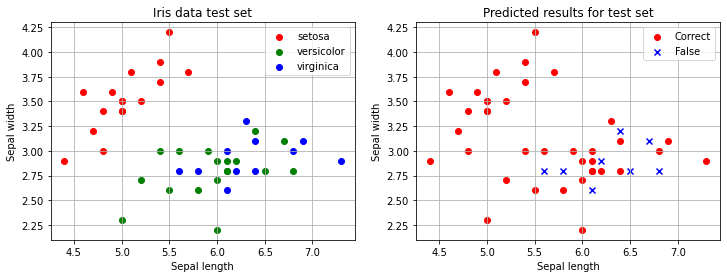

In [6]:
y_train_pred = log_reg.predict(X_train)
correct_train_index = y_train_pred == y_train
false_train_index = y_train_pred != y_train

y_test_pred = log_reg.predict(X_test)
correct_test_index = y_test_pred == y_test
false_test_index = y_test_pred != y_test


plt.rcParams["figure.figsize"] = (12,4)       

plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], c = 'r', label='setosa')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], c = 'g', label='versicolor')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], c = 'b', label='virginica')
plt.xlabel('Sepal length'), plt.ylabel('Sepal width'), plt.grid(), plt.legend()    
plt.title('Iris data test set')

plt.subplot(1, 2, 2)
plt.scatter(X_test[correct_test_index,0], X_test[correct_test_index,1],\
            c = 'r', marker = 'o', label='Correct')
plt.scatter(X_test[false_test_index,0], X_test[false_test_index,1], \
            c= 'b',  marker = 'x', label='False')
plt.xlabel('Sepal length'), plt.ylabel('Sepal width'), plt.grid(), plt.legend()      
plt.title('Predicted results for test set')

plt.show()